In [2]:
import tensorflow as tf
import keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

In [4]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [5]:
filenames=os.listdir("dog vs cat/dataset/training_set")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

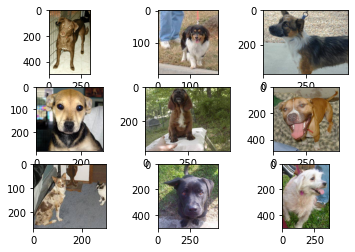

In [6]:
from matplotlib import pyplot
from matplotlib.image import imread
folder = 'dog vs cat/dataset/training_set/dogs'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + '/dog.' + str(i+1) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

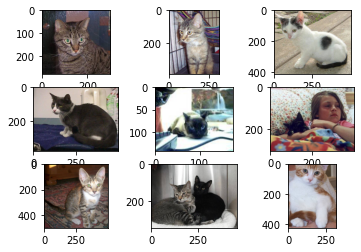

In [7]:
folder = 'dog vs cat/dataset/training_set/cats'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + '/cat.' + str(i+1) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Pre-Process Photo Sizes

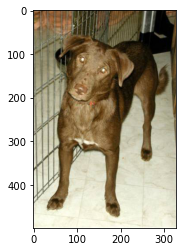

(499, 327, 3)


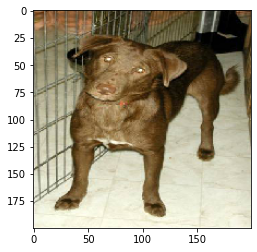

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


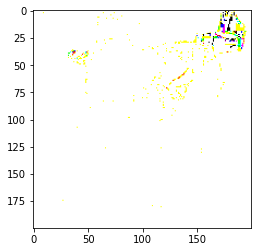

(0,) (0,)


In [8]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt
# define location of dataset
folder = 'dog vs cat/dataset/training_set/dogs/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
# determine class
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
# load image
    photo = load_img(folder + file)
    plt.imshow(photo)
# show the figure
    plt.show()
    photo = img_to_array(photo)
    print(photo.shape)
    photo = load_img(folder + file, target_size=(200, 200))
    plt.imshow(photo)
    plt.show()
    
# convert to numpy array
    photo = img_to_array(photo)
    plt.imshow(photo)
    plt.show()
    break
# store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
#save('dogs_vs_cats_photos.npy', photos)
#save('dogs_vs_cats_labels.npy', labels)

In [36]:
import numpy as np

img_array = np.load('dogs_vs_cats_photos.npy')
#print(img_array.shape)
#print(img_array[1])

(200, 200, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


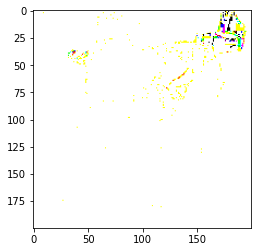

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


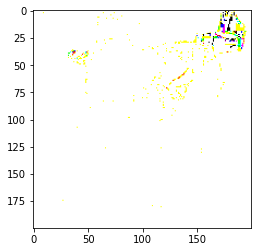

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 200)


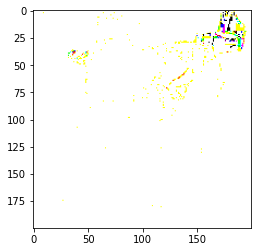

(array([  0,   0,   0, ..., 199, 199, 199], dtype=int64), array([  0,   0,   0, ..., 199, 199, 199], dtype=int64), array([0, 1, 2, ..., 0, 1, 2], dtype=int64))


In [37]:
from matplotlib import pyplot as plt
import cv2
for i in range(0,9):
    image= cv2.resize(img_array[i], (200, 200), interpolation = cv2.INTER_AREA)
    print(image.shape)
    plt.imshow(image)
    plt.show()
    plt.imshow(img_array[i])
    plt.show()
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Grayscale', grayscale)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print(grayscale.shape)
    plt.imshow(img_array[i], cmap='gray')
    plt.show()
    print(np.where(img_array[i]!=0))
    #print(img_array[i])
    
    break
    


In [14]:
# load and confirm the shape
from numpy import load
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

(4000, 200, 200, 3) (4000,)


In [1]:
import cv2
import numpy as np

In [41]:
from os import listdir
folder = 'dog vs cat/dataset/training_set/dogs/'

for file in listdir(folder):
    
    image = cv2.imread(folder + file,0)
    cv2.imshow('image',image)
    #cv2.imshow("image",image)
    down_width = 200
    down_height = 200
    down_points = (down_width, down_height)
    try:
        resize_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)
    except:
        break 
    cv2.imshow('Resized Down by defining height and width', resize_down)
    cv2.waitKey()
    cv2.destroyAllWindows()
    break
    

In [11]:
import os
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

In [6]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Found 5972 images belonging to 2 classes.
Found 2028 images belonging to 2 classes.
Epoch 1/10
94/94 [==============================] - 3369s 36s/step - loss: 0.6226 - accuracy: 0.9474 - val_loss: 0.0778 - val_accuracy: 0.9679
Epoch 2/10
94/94 [==============================] - 2563s 27s/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0788 - val_accuracy: 0.9749
Epoch 3/10
94/94 [==============================] - 2550s 27s/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0793 - val_accuracy: 0.9739
Epoch 4/10
94/94 [==============================] - 2411s 26s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9753
Epoch 5/10
94/94 [==============================] - 2413s 26s/step - loss: 8.7054e-04 - accuracy: 1.0000 - val_loss: 0.0888 - val_accuracy: 0.9758
Epoch 6/10
94/94 [==============================] - 2378s 25s/step - loss: 6.0317e-04 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9749
Epoch 7/10
94/94 [==============================] 

In [1]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# run the test harness for evaluating a model
def run_test_harness():
# define model
	model = define_model()
	print('Model Defined')    
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	print('Training')    
	train_it = datagen.flow_from_directory('finalize_dogs_vs_cats/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	model.fit(train_it, steps_per_epoch=len(train_it), epochs=5, verbose=0)
	# save model
	print('Model fit')    
	model.save('final_model.h5')
 
# entry point, run the test harness
run_test_harness()

Model Defined
Training
Found 8000 images belonging to 2 classes.
Model fit


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.]


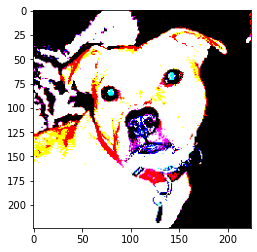

In [12]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.jpg')
    
	plt.imshow(img[0])
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cat=0, dog=1
Output is:
[0.]


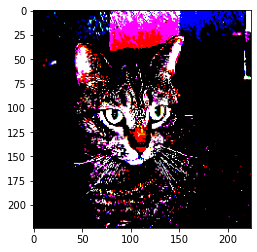

In [32]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('dataset_dogs_vs_cats/test/cats/cat.1.jpg')   
	plt.imshow(img[0])
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print('Output is:')
	print(result[0])
 
# entry point, run the example
print('cat=0, dog=1')
run_example()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cat=0, dog=1
Output is:
[1.]


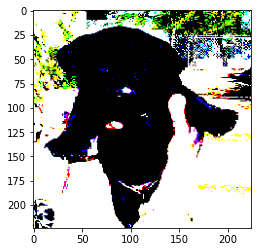

In [33]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('dataset_dogs_vs_cats/test/dogs/dog.329.jpg')   
	plt.imshow(img[0])
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print('Output is:')
	print(result[0])
 
# entry point, run the example
print('cat=0, dog=1')
run_example()

In [3]:
from keras.models import load_model
model = load_model('final_model.h5')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      